# Test 7: Cholesky Assembly for increasing number of regressors

This test captures the runtime for the Assembly, which is done prior to the Cholesky decomposition, with GPRat on the CPU and GPU.
We use a fixed problem size of $32768=2^{15}$, an increasing number of tiles in $\{1,2,4,8,16,32,64,128,256,512\}$, a fixed number of cores of $48$, an increasing number of regressors in $\{X,Y\}$, a fixed number of CUDA streams of XY, and loop 11 times (first loop is ignored of warmup).

Findings:

- ...

In [1]:
# setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.cm import viridis
from matplotlib.colors import Normalize
import matplotlib as mpl

mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams.update({'font.size': 11})
mpl.rcParams.update({'errorbar.capsize': 5})

In [ ]:
# load data

apex_dir_assembly = "./data/7"

names_assembly = [
    "cholesky_step assembly",
    "assemble K_tiles"
]

file_headers = [
    "n_cores",
    "n_train",
    "n_tiles",
    "n_reg",
    "n_loops"
]

def apex_files_to_df(dir, names):
    data = []
    for filename in os.listdir(dir):
        if filename.endswith(".csv"):
            parts = filename.replace("apex_profiles_", "").replace(".csv", "").split("_")
            file_params = dict(zip(file_headers, map(int, parts)))
            file_path = os.path.join(dir, filename)
            df = pd.read_csv(file_path)
            df = df[df['name'].isin(names)]
            for key, value in file_params.items():
                df[key] = value
            data.append(df)
    df_combined = pd.concat(data, ignore_index=True)
    return df_combined

df_assembly = apex_files_to_df(apex_dir_assembly, names_assembly)

NameError: name 'df_cholesky' is not defined

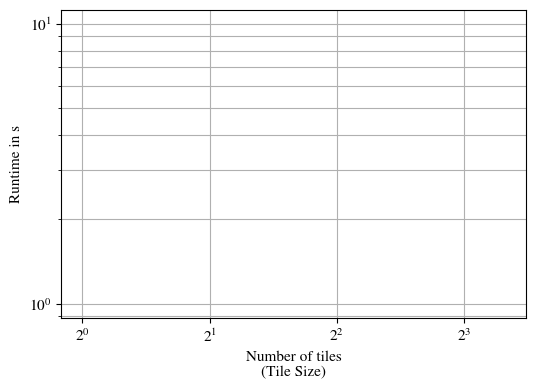

In [ ]:
# plot for assembly
# TODO

n_train = 32768

plt.figure(figsize=(6, 4))

plt.xlabel('Number of tiles\n(Tile Size)')
plt.ylabel('Runtime in s')
plt.grid(True, which="both")
plt.xscale('log', base=2)
plt.yscale("log", base=10)

xticks = df_assembly['n_tiles'].unique()
tile_sizes = n_train / xticks
plt.xticks(
    xticks,
    [f"{int(tile)}\n({int(size)})" for tile, size in zip(xticks, tile_sizes)],
)

plt.legend()
plt.savefig("./pdf/cholesky-reg.pdf")